### **Importing all Neccessary Libraries**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix,accuracy_score
from wordcloud import WordCloud,STOPWORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Data Preprocessing**

In [28]:
# read the dataset
data = pd.read_csv('/content/sample_data/airline_sentiment_analysis.csv')

# view the top rows
data.head()

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         11541 non-null  int64 
 1   airline_sentiment  11541 non-null  object
 2   text               11541 non-null  object
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


### **Visualization**

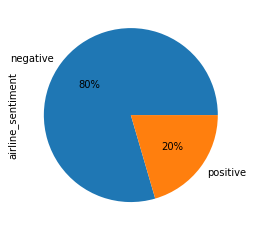

In [30]:
#Piechart

data.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [31]:
data['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

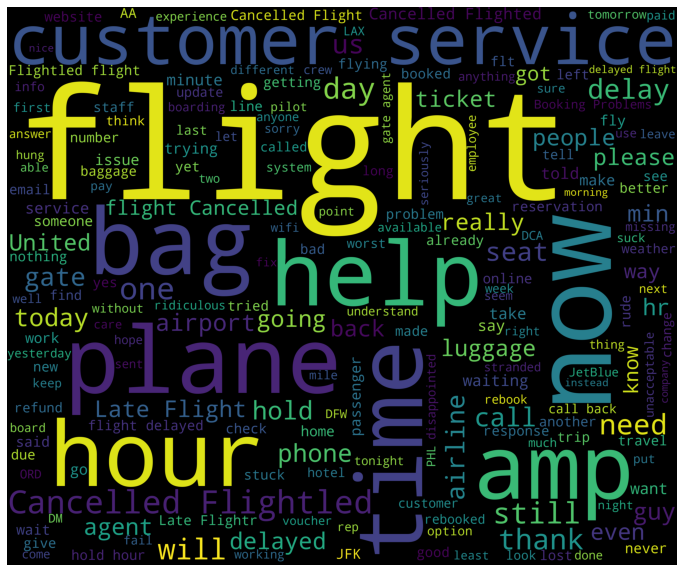

In [32]:
#Word Cloud for Negative Sentiment 

new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



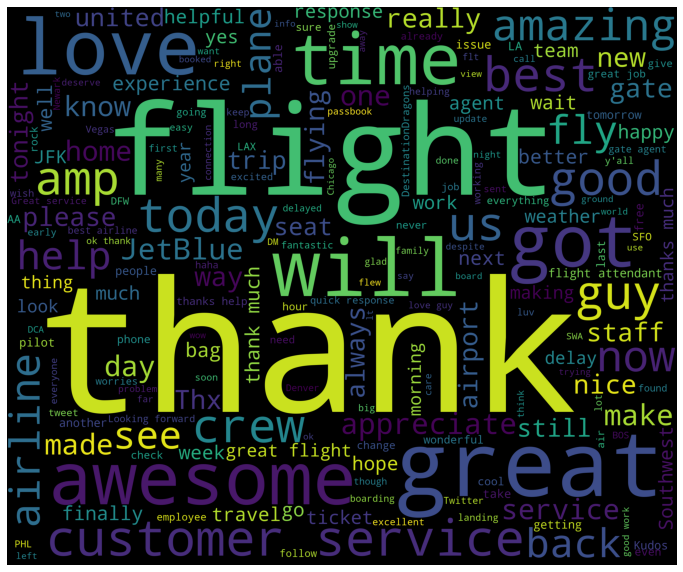

In [33]:
#Word Cloud for Positive Sentiment 

new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Data Cleaning**

In [34]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 
  
data['text']=data['text'].apply(lambda x: tweet_to_words(x))

### **Train-Test Split**

In [35]:
# train test split
train, test = train_test_split(data, test_size = 0.2, stratify = data['airline_sentiment'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape

((9232, 3), (2309, 3))

In [36]:
# create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=2000, stop_words=ENGLISH_STOP_WORDS)

# fit the object with the training data tweets
tfidf_vectorizer.fit(train.text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, sublinear_tf=False,
                token_pa

In [37]:
# transform the train and test data
train_idf = tfidf_vectorizer.transform(train.text)
test_idf  = tfidf_vectorizer.transform(test.text)

## **Model Building and Evaluation**

### **1. Logistic Regression**

In [38]:
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_idf, train.airline_sentiment)

# predict the model on the test data
predict_test = model_LR.predict(test_idf)

print(confusion_matrix(test['airline_sentiment'],predict_test))
print("Accuracy Score",accuracy_score(test['airline_sentiment'],predict_test))

[[1797   39]
 [ 173  300]]
Accuracy Score 0.9081853616284106


In [39]:
test['airline_sentiment'].value_counts()

negative    1836
positive     473
Name: airline_sentiment, dtype: int64

### **2. Multinomial Naive Bayes**

In [40]:

nb=MultinomialNB()
nb.fit(train_idf, train.airline_sentiment)
nb_pred=nb.predict(test_idf)
print(confusion_matrix(test['airline_sentiment'],nb_pred))
print("Accuracy Score",accuracy_score(test['airline_sentiment'],nb_pred))

[[1815   21]
 [ 233  240]]
Accuracy Score 0.8899956691208315


### **3. Decision Tree Classifier**

In [41]:
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(train_idf, train.airline_sentiment)
dtree_pred=dtree.predict(test_idf)
print(confusion_matrix(test['airline_sentiment'],dtree_pred))
print("Accuracy Score",accuracy_score(test['airline_sentiment'],dtree_pred))

[[1695  141]
 [ 159  314]]
Accuracy Score 0.870073624945864


### 4. **Random Forest Classifier**

In [42]:
rf_tree = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_tree.fit(train_idf,train.airline_sentiment)
rftree_pred=rf_tree.predict(test_idf)
print(confusion_matrix(test['airline_sentiment'],rftree_pred))
print("Accuracy Score",accuracy_score(test['airline_sentiment'],rftree_pred))

[[1772   64]
 [ 160  313]]
Accuracy Score 0.9029883066262451


### **5. KNeighbors Classifier**

In [43]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsModel = KNeighborsClassifier(n_neighbors = 7,
                                       weights = 'distance',
                                      algorithm = 'brute')

KNeighborsModel.fit(train_idf,train.airline_sentiment)
knn_pred=KNeighborsModel.predict(test_idf)
print(confusion_matrix(test['airline_sentiment'],knn_pred))
print("Accuracy Score",accuracy_score(test['airline_sentiment'],knn_pred))

[[1707  129]
 [ 141  332]]
Accuracy Score 0.8830662624512776


### **Creating a Pipeline Model**

In [44]:
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=2000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.text, train.airline_sentiment)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=2000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterward...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),


In [45]:

# sample tweet
text = ["Thanks so much for sharing your experience with us. We hope to see you again soon."]

# predict the label using the pipeline
pipeline.predict(text)

array(['positive'], dtype=object)

In [46]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="analysis_pipeline.joblib")

['analysis_pipeline.joblib']

In [47]:
# import joblib
from joblib import load

# sample tweet text
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]

# load the saved pipleine model
pipeline = load("analysis_pipeline.joblib")

# predict on the sample tweet text
pipeline.predict(text)

array(['negative'], dtype=object)